In [1]:
#import baic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import other library for modelling,scaling,svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
#Read train dataset
data=pd.read_csv("train.csv")
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Check null values
data.isnull().sum().reset_index().sort_values(by=0,ascending=False)
#so there is no null value

,index,0
0,label,0
516,pixel515,0
518,pixel517,0
519,pixel518,0
520,pixel519,0
521,pixel520,0
522,pixel521,0
523,pixel522,0
524,pixel523,0
525,pixel524,0


In [5]:
#Check outliers analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
#Read test dataset
data_test=pd.read_csv("test.csv")
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#ince the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, so you can sub-sample the data for training (10-20% of the data should be enough to achieve decent accuracy).
data=data[:4200]

In [8]:
#check number of rows and columns now
data.shape

(4200, 785)

In [9]:
#Here output variable is label 

In [10]:
data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

# Model Building

In [11]:
#split dataset into train and test
x=data.drop(['label'],axis=1)
y=data['label']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=40)

In [13]:
x_final=data_test

In [14]:
x_train.shape

(2940, 784)

In [15]:
y_train.shape

(2940,)

In [16]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Scale dataset
x_train=scale(x_train)
x_test=scale(x_test)

In [18]:
#Linear model
model=SVC(kernel='linear')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)



In [19]:
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))

Accuracy is: 0.8936507936507937


In [20]:
#Try non linear model
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [21]:
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))

Accuracy is: 0.8992063492063492


In [22]:
model=SVC(kernel='poly')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [23]:
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))

Accuracy is: 0.6476190476190476


# Grid Search: Hyperparameter Tuning

In [24]:
#So, we can see best model is using rbf
#lets now find best hyper parameter for rbf kernel. Rbf can create enclosed boundary also.
#We will use GridSearchCV
fold=KFold(n_splits=5,random_state=101,shuffle=True)

params={'C':[0.1,1,10,100,1000],
        'gamma':[1e-1,1e-2,1e-3,1e-4,1e-5]}

model_cv=GridSearchCV(estimator=SVC(kernel='rbf'),
                      param_grid=params,
                      cv=fold,
                      scoring='accuracy',
                      verbose=1,
                     return_train_score=True,
                     n_jobs=-1)

model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 32.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [25]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,61.239997,6.414603,7.948304,1.179921,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.102041,0.122449,0.107143,...,0.106122,0.009038,24,0.113095,0.110119,0.113946,0.116922,0.112670,0.113350,0.002194
1,57.777763,2.854345,6.221889,0.646747,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.193878,0.234694,0.214286,...,0.211905,0.013758,19,0.217262,0.211735,0.213435,0.218963,0.217687,0.215816,0.002750
2,39.684315,1.587215,6.706994,0.624240,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.824830,0.821429,0.819728,...,0.821088,0.001983,12,0.850765,0.846088,0.849915,0.840986,0.845238,0.846599,0.003520
3,54.236836,2.060629,7.396119,1.094259,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.316327,0.350340,0.319728,...,0.310884,0.034376,18,0.344388,0.343537,0.337160,0.286565,0.315051,0.325340,0.022105
4,62.466309,7.048760,6.948164,0.948879,0.1,1e-05,"{'C': 0.1, 'gamma': 1e-05}",0.102041,0.122449,0.107143,...,0.106122,0.009038,24,0.113095,0.110119,0.113946,0.116922,0.112670,0.113350,0.002194
5,49.337803,1.960416,6.476008,0.646917,1,0.1,"{'C': 1, 'gamma': 0.1}",0.156463,0.183673,0.163265,...,0.168707,0.009278,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,48.189424,2.436837,5.988755,0.725801,1,0.01,"{'C': 1, 'gamma': 0.01}",0.666667,0.675170,0.647959,...,0.670408,0.013322,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,17.441526,1.622478,3.945651,0.149969,1,0.001,"{'C': 1, 'gamma': 0.001}",0.906463,0.891156,0.904762,...,0.905102,0.007786,8,0.972789,0.978741,0.975340,0.972364,0.974915,0.974830,0.002272
8,24.602885,1.956845,5.456167,0.674077,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.867347,0.877551,0.877551,...,0.874490,0.003788,11,0.901361,0.890731,0.900510,0.893282,0.895833,0.896344,0.004090
9,54.365779,0.654053,7.069062,0.842410,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.328231,0.375850,0.352041,...,0.334354,0.032724,17,0.366071,0.377976,0.367347,0.320153,0.345663,0.355442,0.020511


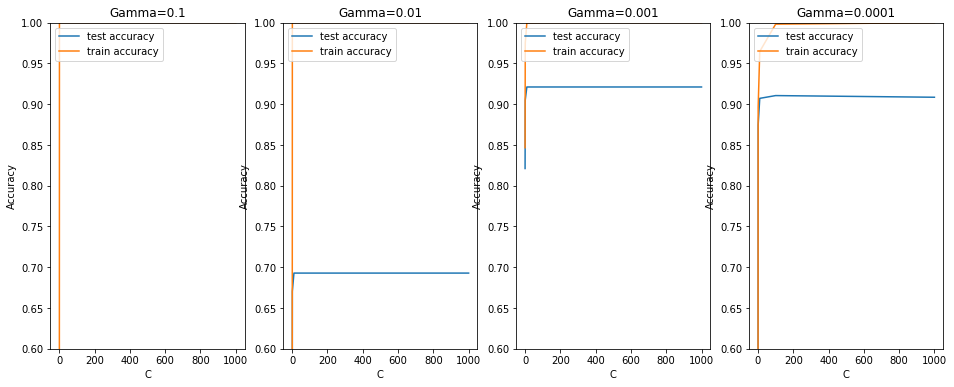

In [26]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/4
plt.subplot(141)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 2/4
plt.subplot(142)
gamma_001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 3/4
plt.subplot(143)
gamma_0001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')



# subplot 4/4
plt.subplot(144)
gamma_00001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_00001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_00001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')



In [27]:
#Find best score
model_cv.best_params_

{'C': 10, 'gamma': 0.001}